# Load data

In [110]:
import re
import numpy as np
import matplotlib.pyplot as plt

import os

In [111]:
# utils
def get_frame_num(labels):
  frame_num = 0
  frame_num_list = re.findall(r'\d+', labels[0])

  if len(frame_num_list) != 0 and int(frame_num_list[0]) != 1:
    frame_num = int(re.findall(r'\d+', labels[0])[0])
  else:
    frame_num = max(*re.findall(r'\d+', ' '.join(labels)))

  return int(frame_num)

In [112]:
files = os.listdir('data/labels/')

In [113]:
files

['id1_hook_2',
 'id0_jab_1',
 'id0_uper_2',
 'id0_jab_2',
 'id1_hook_1',
 'id0_uper_1',
 'id0_hook_2',
 'id1_jab_1',
 'id0_hook_1',
 'id1_jab_2',
 'id1_uper_1',
 'id1_uper_2']

In [114]:
puch_data_dict = {}

for f in files:
  with open(f'data/labels/{f}') as file:
    labels = file.readlines()
    
  N = get_frame_num(labels)
  y = np.zeros(N, dtype=int)
  
  for lab in labels:
    C = re.findall(r'\d:', lab)

    if len(C) == 0:
      continue

    if len(C) == 1:
      C = int(C[0][0])

    idxs = re.findall(r'\d+-\d+', lab)
    for idx in idxs:
      start, stop = idx.split('-')
      y[int(start): int(stop)] = C

  puch_data_dict[str(f)] = {
    'y': y
  }

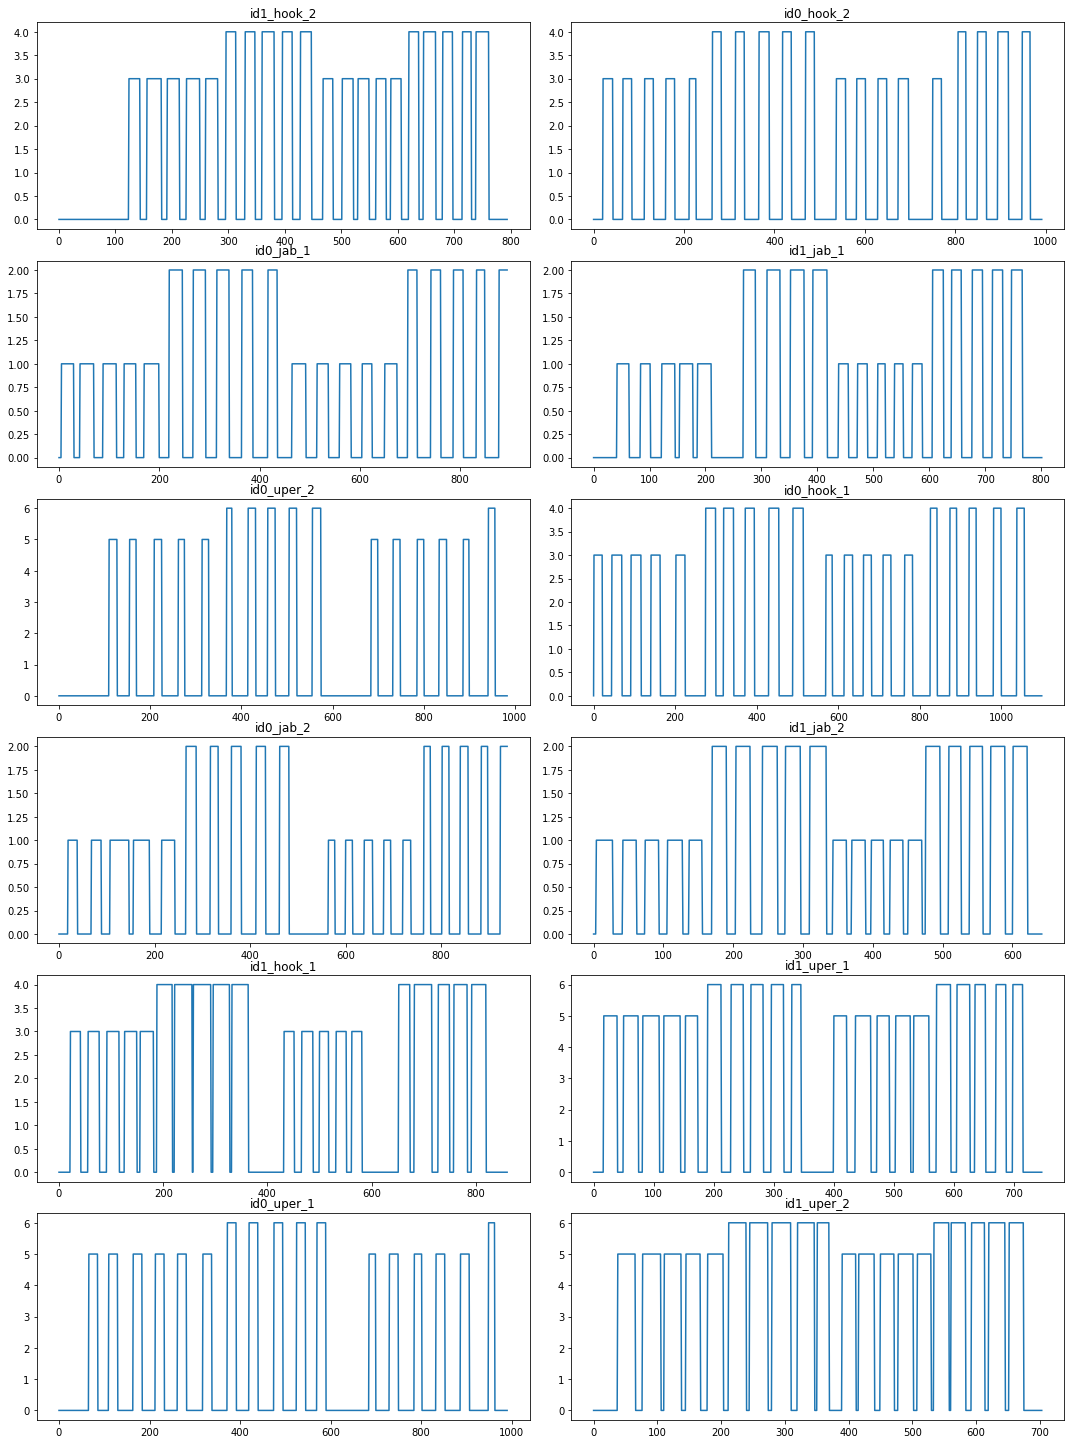

In [115]:
fig, ax = plt.subplots(len(files) // 2, 2, figsize=(15, 20))
fig.tight_layout()

for i in range(2):
  for j in range(len(files) // 2):
    file_name = files[i * 6 + j]
    data = puch_data_dict.get(file_name)
    ax[j, i].plot(data.get('y'))
    ax[j, i].set_title(file_name)